# Práctica final NLP

## Introducción

El objetivo principal de la presente actividad es el de evaluar los conocimientos del alumno planteando algunos retos de NLP lo más prácticos y realistas posibles. De hecho, los ejercicios que se proponen a continuación son retos a los que se enfrentan muchas empresas y organizaciones hoy en día. Durante el desarrollo de la práctica el alumno tendrá ocasión de desarrollar las principales tareas y módulos necesarios en un proyecto de
análisis de sentimiento.

**No se busca que los modelos tengan un performance** (precision, recall, f1-score,
...) **excelente, sino que los pasos que se propongan para resolver los ejercicios sean razonables** (acorde a lo visto en la asignatura) **y estén justificados. Es importante también comentar los resultados obtenidos.**

## Ejercicios

Los siguientes ejercicios que se proponen cubren todas las etapas en un proyecto
de NLP clásico.
Cada ejercicio se corresponde con una etapa y todos ellos están relacionados.

![img](https://drive.google.com/uc?id=1_2J3vB954Hi2gJeiGnQMd_02WX3vbTfc)

Cada ejercicio será resuelto en un notebook. **El alumno deberá resolver todos los
ejercicios.**

## 1. Descarga y exploración del corpus

El alumno **descargará el/los corpus** que desee (detalle sobre los datos a utilizar en
el siguiente punto) y realizará un **análisis exploratorio** de los datos.

Este ejercicio deberá contener:

- Cardinalidad del vocabulario
- Distribución de reviews por número de estrellas
- No de reviews positivas y negativas
- N-grams más frecuentes
- Nubes de palabras
- Visualización en 2 dimensiones de algunos word embeddings calculados con
Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)
- Conclusiones de la exploración
- Cualquier otra métrica / exploración / cálculo que el alumno considere

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Datasets

**Reviews de Amazon**: Reviews de productos de Amazon clasificadas por categorías (libros,
electrónica, automoción, ...). Las reviews contienen la calificación (número de estrellas) por
lo que es perfecto para problemas de clasificación supervisada del sentimiento.

**El alumno deberá escoger el dataset que desee** (puede trabajar con varios si así lo
prefiere) **de los que aparecen en la columna “5-core”**. Se recomienda trabajar con
subsets de dichos datasets para evitar problemas de memoria.
Enlace: http://jmcauley.ucsd.edu/data/amazon/

Como el link anterior dejo de funcionar, se utilizo el siguiente:
https://amazon-reviews-2023.github.io/

## descarga del dataset y descompresión

In [2]:
# Descargar el archvivo desde el repositorio

# URL del dataset
url_del_dataset = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Digital_Music.jsonl.gz'

# rutas de los archivos a utilizar
ruta_destino_descarga = "Digital_Music.jsonl.gz"
ruta_destino_descomprimido = "Digital_Music.json"

# Descargamos el dataset elegido y guardamos el archivo en la ruta de destino especificada en Colab
!wget "{url_del_dataset}" -O "{ruta_destino_descarga}"

# Verificamos que el archivo se haya descargado correctamente
!ls -l "{ruta_destino_descarga}"

# Descomprimo el archivo guardando el resultado en la ruta especificada de Drive
!gunzip -c "{ruta_destino_descarga}" > "{ruta_destino_descomprimido}"

# Verifico que el archivo se haya descargado correctamente
!ls -l "{ruta_destino_descomprimido}"

--2024-05-12 01:48:48--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_2023/raw/review_categories/Digital_Music.jsonl.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26231818 (25M) [application/x-gzip]
Saving to: ‘Digital_Music.jsonl.gz’

Digital_Music.jsonl 100%[===================>]  25.02M  1.73MB/s    in 9.1s    

2024-05-12 01:48:58 (2.75 MB/s) - ‘Digital_Music.jsonl.gz’ saved [26231818/26231818]

-rw-r--r-- 1 root root 26231818 Feb 26 20:07 Digital_Music.jsonl.gz
-rw-r--r-- 1 root root 78823304 May 12 01:48 Digital_Music.json


## cargamos el json en un dataframe y lo revisamos

In [3]:
import pandas as pd

df = pd.read_json(ruta_destino_descomprimido, lines=True)

In [4]:
df.head().T

,0,1,2,3,4
rating,5,5,5,1,3
title,Nice,Excellent,Great service,No good,"Cool concept, so-so execution..."
text,If i had a dollar for how many times I have pl...,awesome sound - cant wait to see them in perso...,This is a great cd. Good music and plays well....,"These are not real German singers, they have a...",I first heard this playing in a Nagoya shop an...
images,[],[],[],[],[]
asin,B004RQ2IRG,B0026UZEI0,B0055JSYHC,B000F9SMUQ,B0049D1WVK
parent_asin,B004RQ2IRG,B0026UZEI0,B0055JSYHC,B000F9SMUQ,B0049D1WVK
user_id,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,AHGAOIZVODNHYMNCBV4DECZH42UQ,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,AFW2PDT3AMT4X3PYQG7FJZH5FXFA
timestamp,2021-04-21 02:36:53.292000,2011-06-15 19:52:05,2021-03-15 20:06:33.006000,2014-07-13 02:49:01,2011-06-25 19:19:55
helpful_vote,0,0,0,0,0
verified_purchase,True,True,True,True,False


## Nos quedamos solo con "rating" y "text"

In [5]:
df_music = df[["rating", "text"]]
df_music.head()

,rating,text
0,5,If i had a dollar for how many times I have pl...
1,5,awesome sound - cant wait to see them in perso...
2,5,This is a great cd. Good music and plays well....
3,1,"These are not real German singers, they have a..."
4,3,I first heard this playing in a Nagoya shop an...


In [6]:
# Revisamos la información del dataframe
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130434 entries, 0 to 130433
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   rating  130434 non-null  int64 
 1   text    130434 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


In [7]:
# El dataset NO contiene nulos

# Ahora pasamos a revisar la columna rating para ver si está o no muy desbalanceada
df_music['rating'].value_counts()

rating
5    100618
4     14129
3      6392
1      6136
2      3159
Name: count, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='rating', ylabel='count'>

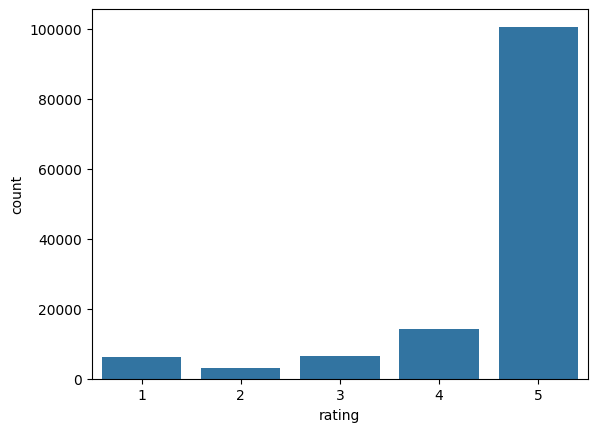

In [9]:
sns.countplot(x='rating', data=df_music)

## Revisamos para balancear y dejar preparado el dataset a trabajar

In [10]:
#creamos un filtro para separar el dataset en Rating mayores a 3 y el resto
filter = df_music['rating'] > 3

df_lower = df_music[~filter] # usamos el filtro negado para que tome 1,2,3
df_lower.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15687 entries, 3 to 130432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  15687 non-null  int64 
 1   text    15687 non-null  object
dtypes: int64(1), object(1)
memory usage: 367.7+ KB


In [11]:
df_upper = df_music[filter] # usamos el filtro para que tome 4,5
df_upper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114747 entries, 0 to 130433
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   rating  114747 non-null  int64 
 1   text    114747 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


In [12]:
# revisamos la properción
df_upper.shape[0] / df_lower.shape[0]

7.314782941288965

In [13]:
# vamos a reducir la proporción para que sea menor
df_upper_reshape = df_upper[:(int)(df_upper.shape[0]/2)]
df_upper_reshape.shape

(57373, 2)

In [14]:
#revisamos la nueva proporción
df_upper_reshape.shape[0] / df_lower.shape[0]

3.6573595971186332

In [15]:
# armamos un nuevo dataframe con los datos
df_music_reshape = pd.concat([df_upper_reshape, df_lower])
df_music_reshape.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73060 entries, 0 to 130432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  73060 non-null  int64 
 1   text    73060 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [16]:
df_music_reshape.head()

,rating,text
0,5,If i had a dollar for how many times I have pl...
1,5,awesome sound - cant wait to see them in perso...
2,5,This is a great cd. Good music and plays well....
5,4,"I just saw ""Star Wars: L'attaque des clones"" l..."
6,5,"This is without a doubt my favorite CD, and I ..."


## Separamos en positivos y negativos y visualizamos

In [17]:
# Marcamos con 1 los rating mayores a 3 y con 0 el resto
import numpy as np
df_music_reshape['rating'] = np.where(df_music_reshape['rating'] > 3, 1, 0)
df_music_reshape['rating'].value_counts()

rating
1    57373
0    15687
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

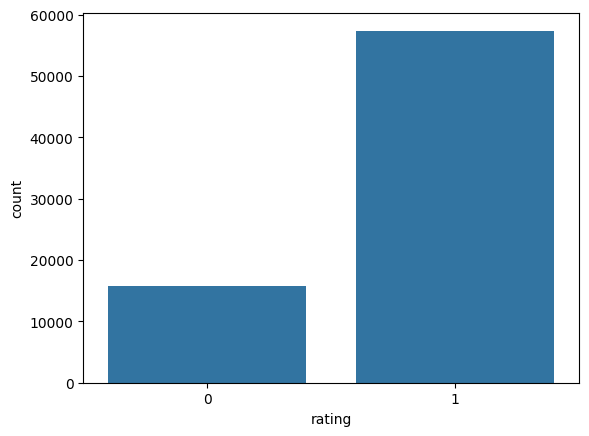

In [18]:
sns.countplot(x='rating', data=df_music_reshape)

## Separamos la data en train y test y la guardamos

In [19]:
# hacemos un separación aleatoria 80/20
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_music_reshape, test_size = 0.20, random_state = 42)

print(f'Dimensiones del dataset de training: {train_data.shape}')
print(f'Dimensiones del dataset de test: {test_data.shape}')

Dimensiones del dataset de training: (58448, 2)
Dimensiones del dataset de test: (14612, 2)


In [20]:
# revisamos que ambos datasets tengan reviews positivas y negativas
train_data['rating'].value_counts()

rating
1    45830
0    12618
Name: count, dtype: int64

In [21]:
test_data['rating'].value_counts()

rating
1    11543
0     3069
Name: count, dtype: int64

In [22]:
# guardamos los dataset
train_data.to_csv('train_data.csv', sep=';', index=False)
test_data.to_csv('test_data.csv', sep=';', index=False)



In [23]:
!cp train_data.csv /content/drive/MyDrive/train_data.csv
!cp test_data.csv /content/drive/MyDrive/test_data.csv

In [24]:
# Comprobamos a abrirlos de nuevo
train_data = pd.read_csv("train_data.csv", sep=';')
test_data = pd.read_csv("test_data.csv", sep=';')
train_data.shape, test_data.shape

((58448, 2), (14612, 2))

In [25]:
train_data.head()

,rating,text
0,0,Only if you want a bunch of vague background R...
1,1,THESE ARE A GREAT SET OF CDS FOR THOSE WHO LI...
2,1,Sounds wonderful. Came on time. As promised. ...
3,1,Barton and Sweeney were regulars in my college...
4,0,Was supposed to have 2 CDs. But there was onl...


## Worldcloud

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

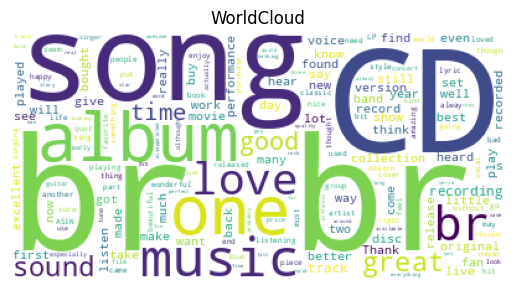

In [27]:
# Combinamos las reviews
combined_text = " ".join(train_data['text'].astype(str))

# Inicializamos el wordcloud
wc = WordCloud(background_color='white')

plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.title("WorldCloud")
plt.show()

In [28]:
# Vemos que algunas stop words pueden ser
# CD, br, song, album, music, sound, songs
train_stopwords = ['CD', 'br', 'song', 'album', 'music', 'sound', 'songs']

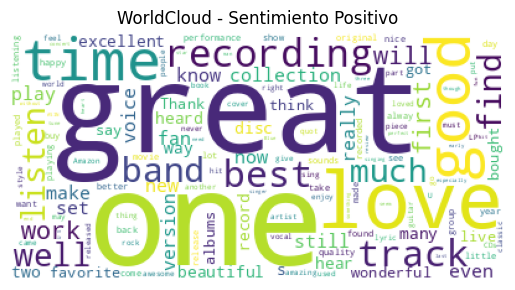

In [29]:
sentimiento_positivo = train_data['rating'] > 0

def worldcloud_positive_sentiment(sentimiento_positivo, train_stopwords):
  # Combinamos las reviews para el sentimiento POSITIVO
  combined_text = " ".join(train_data[sentimiento_positivo]['text'].astype(str))

  # Inicializamos el wordcloud
  wc = WordCloud(background_color='white',
          # Actualizamos las stopwords para incluir palabras comunes del tema
          stopwords = STOPWORDS.update(train_stopwords))

  plt.imshow(wc.generate(combined_text))
  plt.axis('off')
  plt.title("WorldCloud - Sentimiento Positivo")
  plt.show()

worldcloud_positive_sentiment(sentimiento_positivo, train_stopwords)

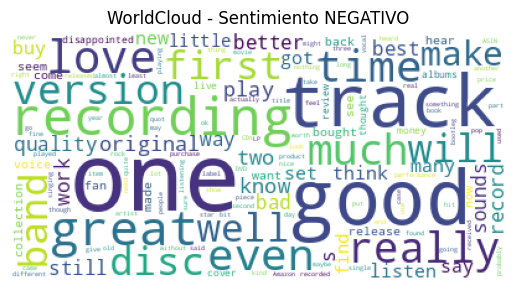

In [30]:
def worldcloud_negative_sentiment(sentimiento_positivo, train_stopwords):
  # Combinamos las reviews para el sentimiento NEGATIVO
  combined_text = " ".join(train_data[~sentimiento_positivo]['text'].astype(str))

  # Inicializamos el wordcloud
  wc = WordCloud(background_color='white',
          # Actualizamos las stopwords para incluir palabras comunes del tema
          stopwords = STOPWORDS.update(train_stopwords))

  plt.imshow(wc.generate(combined_text))
  plt.axis('off')
  plt.title("WorldCloud - Sentimiento NEGATIVO")
  plt.show()

worldcloud_negative_sentiment(sentimiento_positivo, train_stopwords)

In [31]:
# Por lo que podemos ver las palabras que más se repiten no ayudan en mucho
# ya que tanto para sentimiento positivo como negativo
# son casi las mismas palabras las que más resaltan.
# por ejemplo:
# one, great, love, time, good, recording, really, track, version, first, will
# quality, band, DvDs, tracks, 'even', 'much'

In [32]:
# vamos a probar agregar estas palabras a stopword y volver a analizar
train_stopwords = ['CD', 'br', 'song', 'album', 'music', 'sound', 'songs',
                   'one', 'great', 'love', 'time', 'good', 'recording',
                   'really','track', 'version', 'first', 'will',
                   'quality', 'band', 'DvDs', 'tracks', 'even', 'much']

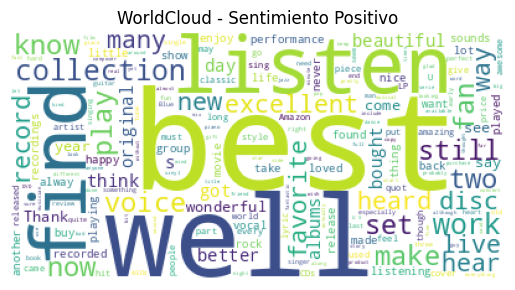

In [33]:
worldcloud_positive_sentiment(sentimiento_positivo, train_stopwords)

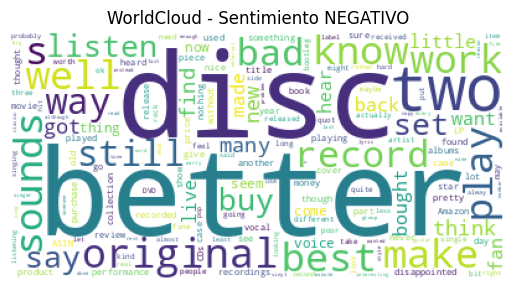

In [34]:
worldcloud_negative_sentiment(sentimiento_positivo, train_stopwords)

In [35]:
# Como vemos, hay muchas palabras que se repiten en ambos sentimientos.
# Esperemos que se pueda obtener un resultado aceptable

## WORD Embeddings

In [36]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import re  # Para Preprocesamiento
import pandas as pd
from time import time  # Tiempo de las operaciones
from collections import defaultdict  # Para Frecuencias de palabras

import spacy  # Para prepocesamiento
import logging  # Configuración de loggings para monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from gensim.models.phrases import Phrases, Phraser

In [37]:
nlp = spacy.load("en_core_web_sm")
def cleaning(doc):
    # Lematizamos y removemos stopwords
    # doc necesita ser a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec usa las palabras de contexto para aprender a representar el vector de una palabra ,
    # si una sentencia tiene solo una o dos palabras ,
    # el beneficio para el training es muy pequeño
    if len(txt) > 2:
        return ' '.join(txt)

In [38]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in train_data['text'])

In [39]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000)]

print('Tiempo para limpiar todo: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para limpiar todo: 8.91 mins


In [40]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(48642, 1)

In [41]:
df_clean.head()

,clean
0,want bunch vague background reznor stuff buy a...
1,great set cd like old style country music
2,sound wonderful come time promise packaging good
3,barton sweeney regular college town see month ...
5,long time consumer sea song chantey find cd ad...


In [42]:
# entrenamos con Word2Vec
import multiprocessing
from gensim.models import Word2Vec

In [43]:
cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print (cores)

2


In [44]:
# Hyperparametros
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

In [45]:
# construimos el vocabulario
t = time()
sent = [row.split() for row in df_clean['clean']]
w2v_model.build_vocab(sent, progress_per=10000)

print('Tiempo para construir el vocabulario: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para construir el vocabulario: 0.01 mins


In [46]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.key_to_index)))

Vocabulario compuesto por 7322 palabras


In [47]:
# entrenamos el modelo
t = time()

w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)


print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 3.11 mins


In [48]:
w2v_model.save('./w2v_model.pkl') # guardamos el modelo

In [49]:
!cp w2v_model.pkl /content/drive/MyDrive/w2v_model.pkl

In [50]:
w2v_sg = Word2Vec.load('./w2v_model.pkl') # cargamos el modelo

In [51]:
# creamos un cluster de palabras
keys = ['cd', 'song', 'album', 'music', 'sound']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [52]:
print(word_clusters)

[['buy', 'dvd', 'amazon', 'copy', 'purchase', 'disc', 'album', 'bundle', 'item', 'itune'], ['track', 'tune', 'album', 'ballad', 'angie', 'lyric', 'barbra', 'upbeat', 'streisand', 'throwaway'], ['cd', 'compilation', 'song', 'release', 'track', 'reba', 'band', 'paradoxx', 'lp', 'platinum'], ['classical', 'stimulate', 'lifescape', 'mariachi', 'liturgical', 'jazz', 'mediterranean', 'style', 'classify', 'idiom'], ['sounding', 'muffle', 'reverb', 'tinny', 'compress', 'processing', 'muffled', 'treble', 'unpleasant', 'quality']]


In [53]:
from sklearn.manifold import TSNE

In [54]:
# Reducimos dimensiones a 2D
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [55]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [56]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

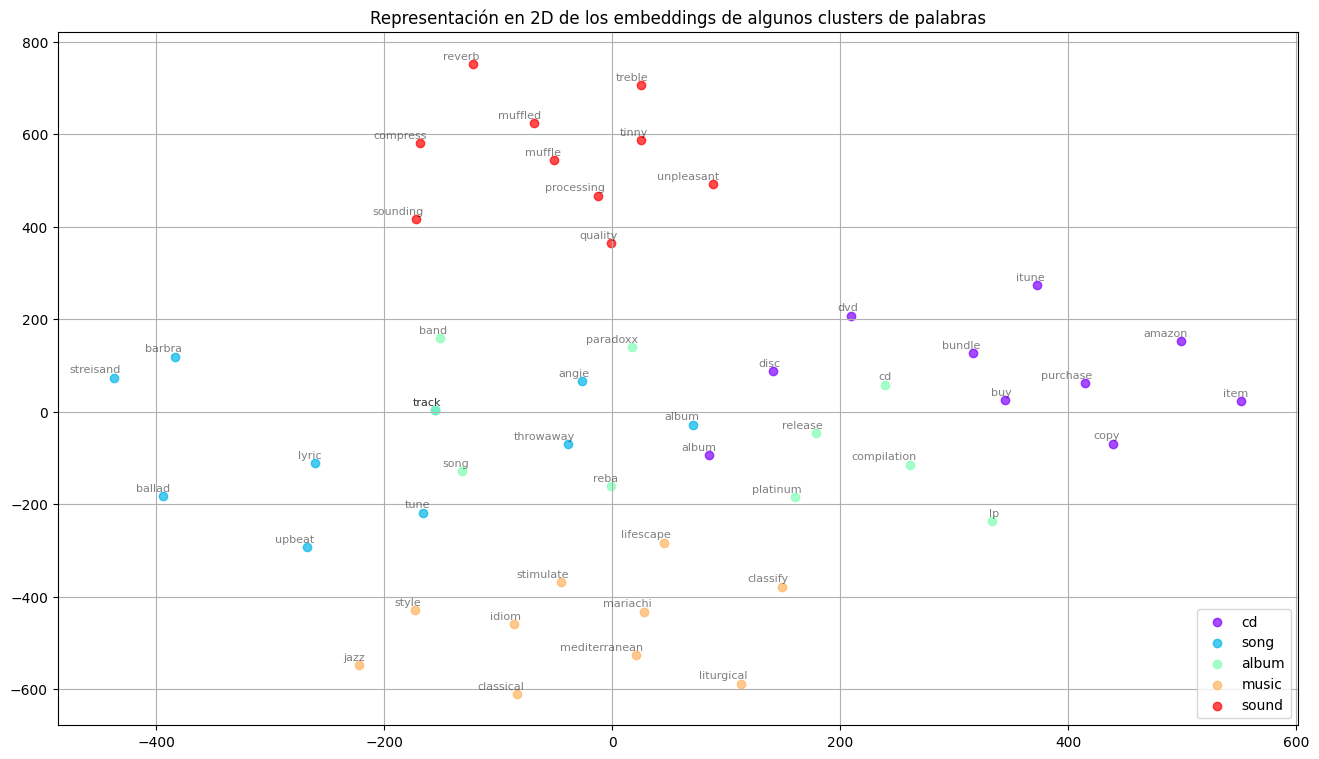

In [57]:
# Visualizamos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

## Conclusiones

- El dataset estaba muy desbalanceado. Se tuvo que adaptar para intentar tener una mejor predicción en futuros entrenamientos
- Las reviews tienen muchas palabras en común tanto para las reviews positivos como para las negativas, esto puede dificultar también la predicción.